# Load change requests (df) resume book (resume_book) dataframes.

In [1]:
import pandas as pd

csv_url = f"https://docs.google.com/spreadsheets/d/1IgOnbPhOoCRDBcTf9FIHwP54rHwcqSyKSJTE-XKNnJw/export?format=csv&gid=523778578"
df = pd.read_csv(csv_url)
df = df[df['Done?'] != 'yes']
df.head(2)

,Done?,Timestamp,Email Address,First Name,Last Name,Preferred Name,Pronouns,Email,"Do you want to add, update, or remove your resume?",Graduation Quarter,Graduation Year,Are you looking for an internship or full-time position?,What types of roles are you looking for?,Please copy/paste the text from your resume here. It is ok if it's not pretty! We just want your info to be easily searchable.,Upload Resume,Why do you want your resume removed?
1002,NaN,11/12/2024 13:30:00,clm47@cs.washington.edu,Cing,Mawi,Mawi Mawi,She/her,clm47@cs.washington.edu,I already have a resume in this book and want ...,Spring,2026.0,Both,"Software Development/Software Engineering, Pro...",MAWI MAWI\nmawicing0@gmail.com | (206)486-4519...,https://drive.google.com/open?id=1TuPF1n6e1QXn...,NaN
1003,NaN,11/13/2024 13:00:09,uwewang@cs.washington.edu,Elizabeth,Wang,Elizabeth,She/Her,uwewang@cs.washington.edu,I already have a resume in this book and want ...,Spring,2026.0,Internship,"Software Development/Software Engineering, Pro...","EDUCATION\nElizabeth Wang\nSeattle, WA • 480-2...",https://drive.google.com/open?id=1y0L0Wxahw57a...,NaN


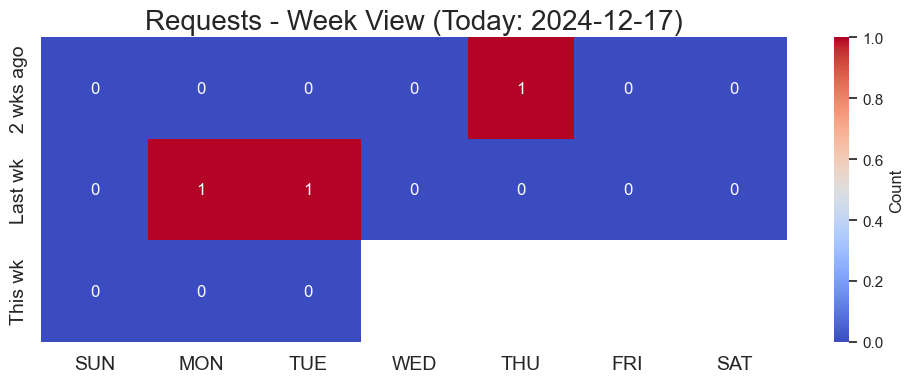

In [ ]:
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

today = datetime.now().date()

days_of_week = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
grid = np.zeros((3, 7)) 
start_of_week = today - timedelta(days=today.weekday() + 1) 

date_counts = df['Timestamp'].dt.date.value_counts().to_dict()

for row in range(3):
    for col in range(7):
        cell_date = start_of_week - timedelta(days=(2 - row) * 7 - col)  
        if cell_date <= today: 
            grid[row, col] = date_counts.get(cell_date, 0)

mask = np.zeros_like(grid, dtype=bool)
for row in range(3):
    for col in range(7):
        cell_date = start_of_week - timedelta(days=(2 - row) * 7 - col)
        if cell_date > today:
            mask[row, col] = True

plt.figure(figsize=(10, 4))
sns.set(style='white')
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap='coolwarm', mask=mask, 
                 cbar_kws={'label': 'Count'}, linewidths=0)

ax.set_xticks(np.arange(7) + 0.5)
ax.set_xticklabels(days_of_week, ha="center", size=14)
ax.set_yticks(np.arange(3) + 0.5)
ax.set_yticklabels(["2 wks ago", "Last wk", "This wk"], size=14)

plt.title(f"Requests - Week View (Today: {today})", size=20)
plt.tight_layout()
plt.show()

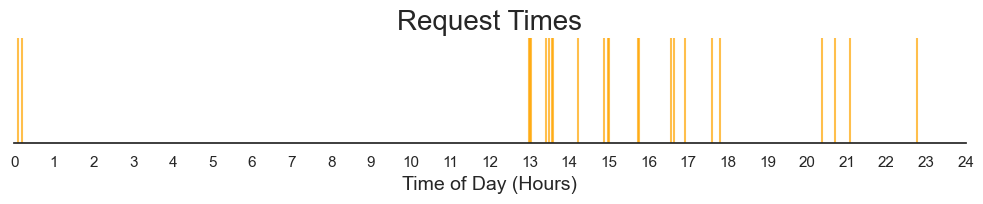

In [34]:
df['Time_Hour'] = pd.to_datetime(df['Timestamp']).dt.hour + \
                  pd.to_datetime(df['Timestamp']).dt.minute / 60.0  
                  
plt.figure(figsize=(10, 2.2))  

for time in df['Time_Hour']:
    plt.axvline(x=time, color='orange', alpha=0.7)

plt.xlim(0, 24)
plt.xlabel('Time of Day (Hours)', size=14)
plt.title('Request Times', size=20)
plt.xticks(range(0, 25, 1))  
plt.yticks([]) 
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.show()


In [19]:
print(f"There are {len(df)} updates to make.")
df['Do you want to add, update, or remove your resume?'].value_counts()

There are 222 updates to make.


,count
"Do you want to add, update, or remove your resume?",
I already have a resume in this book and want to update it to a newer version or update my information in the survey.,217
Add my first resume to this resume book,3
I am no longer looking for a position and wish to remove my resume.,2


In [20]:
csv_url = f"https://docs.google.com/spreadsheets/d/1xqvrDynnWfslrSnOymMtJCrMvmAQBka70L7i8USc5Bs/export?format=csv&gid=0"
resume_book = pd.read_csv(csv_url)
resume_book.head(2)

,First Name,Last Name,Preferred Name,Pronouns,Email,Grad Quarter,Grad Year,Are you looking for an internship or full-time position?,What types of roles are you looking for?,Resume Full Text,Resume Link
0,Ananya,Aatreya,NaN,she/her,ananyaa06@gmail.com,Spring,2028.0,Internship,"Software Development/Software Engineering, Pro...",Machine generated alternative text:\nAnanya Aa...,https://drive.google.com/open?id=1UXiJ5A-YId0y...
1,Abdalla,Abdalla,NaN,NaN,abdalla.abdalla3829@gmail.com,Spring,2026.0,Internship,"Software Development/Software Engineering, Use...",Abdalla Abdalla\n425-399-3922 | abdalla.abdall...,https://drive.google.com/open?id=1TPDqNh3kM_7q...


In [21]:
print(f"There are {len(resume_book)} resume entries.")

There are 696 resume entries.


# Clean dataframes

In [22]:
df_cols_to_clean = ['Email ', 'Email Address', "First Name", "Last Name"]
resume_cols_to_clean = ['Email', 'First Name', "Last Name"]

for col in df_cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.replace(r'\s+', '', regex=True)

for col in resume_cols_to_clean:
    if col in resume_book.columns:
        resume_book[col] = resume_book[col].astype(str).str.lower().str.replace(r'\s+', '', regex=True)

# Make updates

In [23]:
# remove resume
from tqdm import tqdm
remove_rows = df[df["Do you want to add, update, or remove your resume?"] == "I am no longer looking for a position and wish to remove my resume."]
print(f"Deleting rows for {remove_rows['Email ']}")

for index, row in tqdm(remove_rows.iterrows()):
    email = row["Email "]
    email2 = row['Email Address']

    if ((pd.isna(email) and pd.isna(email2)) or email == ""):
        raise ValueError(f"Email is missing for row {index} where resume removal is requested.")

    matching_rows = resume_book[(resume_book["Email"] == email) | (resume_book["Email"] == email2)]

    if len(matching_rows) > 1:
        print(f"Warning: Multiple rows found in resume_book with the email {email} or {email2}. Deleting all matching rows.")

    resume_book = resume_book[resume_book["Email"] != email]

    if len(matching_rows) == 0:
      # resort to name
      firstname = row['First Name']
      lastname = row['Last Name']
      matching_rows = resume_book[(resume_book["First Name"] == firstname) & (resume_book["Last Name"] == lastname)]

      if len(matching_rows) > 1:
        print(f"Warning: Multiple rows found in resume_book with the email {email} or {email2}. Abort deletion.")

      else:
        resume_book = resume_book[(resume_book["First Name"] != firstname) & (resume_book["Last Name"] != lastname)]

Deleting rows for 988    shawnc6@cs.washington.edu
992                 vperi@uw.edu
Name: Email , dtype: object


2it [00:00, 143.51it/s]


In [24]:
print(f"There are {len(resume_book)} resume entries.")

There are 694 resume entries.


In [25]:
df_update_cols = df.loc[:, "First Name":"Upload Resume"].columns.tolist()
df_update_cols = [col for col in df_update_cols if col != "Do you want to add, update, or remove your resume?"]

In [26]:
# add rows
add_rows = df[df["Do you want to add, update, or remove your resume?"] == "Add my first resume to this resume book"]
add_rows = add_rows[df_update_cols]
add_rows.columns = resume_book.columns

resume_book = pd.concat([resume_book, add_rows], ignore_index=True)
print(len(resume_book))

697


In [27]:
# update rows
update_rows = df[df["Do you want to add, update, or remove your resume?"] == "I already have a resume in this book and want to update it to a newer version or update my information in the survey."]
init_len = len(update_rows)
update_rows = update_rows.drop_duplicates(subset=["Email "], keep="last")
update_rows = update_rows.drop_duplicates(subset=["First Name", "Last Name"], keep="last")
print(f"{init_len - len(update_rows)} same-user updates removed. {len(update_rows)} updates to make.")

update_rows_new = update_rows[df_update_cols]
update_rows_new.columns = resume_book.columns

resume_book = pd.concat([resume_book, update_rows_new], ignore_index=True)
print(len(resume_book))

36 same-user updates removed. 181 updates to make.
878


In [28]:
for index, row in tqdm(update_rows.iterrows()):
    email = row["Email "]
    email2 = row['Email Address']

    if ((pd.isna(email) and pd.isna(email2)) or email == ""):
        raise ValueError(f"Email is missing for row {index} where resume removal is requested.")

    matching_rows = resume_book[(resume_book["Email"] == email) | (resume_book["Email"] == email2)]

    if len(matching_rows) > 1:
         later_matching_row_index = matching_rows.index.max()
         resume_book = resume_book.drop(matching_rows.index[matching_rows.index != later_matching_row_index])

    firstname = row['First Name']
    lastname = row['Last Name']

    matching_rows = resume_book[(resume_book["First Name"] == firstname) & (resume_book["Last Name"] == lastname)]

    if len(matching_rows) > 1:
         later_matching_row_index = matching_rows.index.max()
         resume_book = resume_book.drop(matching_rows.index[matching_rows.index != later_matching_row_index])

print(f"\nThere are {len(resume_book)} resume entries.")

181it [00:01, 112.62it/s]


There are 771 resume entries.


# Clean up

In [29]:
resume_book = resume_book.reset_index(drop=True)
resume_book['First Name'] = resume_book['First Name'].str.capitalize()
resume_book['Last Name'] = resume_book['Last Name'].str.capitalize()
# resume_book.to_csv('resume_book.csv', index=False)

In [30]:
csv_url = f"https://docs.google.com/spreadsheets/d/1IgOnbPhOoCRDBcTf9FIHwP54rHwcqSyKSJTE-XKNnJw/export?format=csv&gid=523778578"
df = pd.read_csv(csv_url)
df['Done?'] = 'yes'

# Port updates to resume_book gsheets

In [37]:
from google.colab import auth
import gspread
from google.auth.transport.requests import Request
from google.auth import default
from gspread_dataframe import set_with_dataframe

auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)

In [40]:
spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1xqvrDynnWfslrSnOymMtJCrMvmAQBka70L7i8USc5Bs/edit?gid=0#gid=0')
sheet = spreadsheet.get_worksheet(1)
sheet.clear()
set_with_dataframe(sheet, resume_book)
print("Sheet updated successfully.")


Sheet updated successfully.


In [41]:
import math
num_rows = math.ceil(len(resume_book) / 100) * 100
num_rows

800

In [42]:
from googleapiclient.discovery import build

auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)

sheet_id = '1xqvrDynnWfslrSnOymMtJCrMvmAQBka70L7i8USc5Bs'
service = build('sheets', 'v4', credentials=creds)

body = {
    "requests": [
        # Resize rows
        {
            "updateDimensionProperties": {
                "range": {
                    "sheetId": 0,
                    "dimension": "ROWS",
                    "startIndex": 0,
                    "endIndex": num_rows
                },
                "properties": {
                    "pixelSize": 21
                },
                "fields": "pixelSize"
            }
        },
        # Set text clipping
        {
            "repeatCell": {
                "range": {
                    "sheetId": 0,
                    "startRowIndex": 0,
                    "startColumnIndex": 10,
                    "endColumnIndex": 13
                },
                "cell": {
                    "userEnteredFormat": {
                        "wrapStrategy": "WRAP"
                    }
                },
                "fields": "userEnteredFormat.wrapStrategy"
            }
        }
    ]
}

response = service.spreadsheets().batchUpdate(
    spreadsheetId=sheet_id,
    body=body
).execute()

print("Rows resized and text clipping set successfully.")


Rows resized and text clipping set successfully.


# Port updates to requests gsheets

In [44]:
spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1IgOnbPhOoCRDBcTf9FIHwP54rHwcqSyKSJTE-XKNnJw/edit?gid=523778578#gid=523778578')
sheet = spreadsheet.get_worksheet(0)
sheet.clear()
set_with_dataframe(sheet, df)
print("Sheet updated successfully.")


Sheet updated successfully.
